In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from utils.general import calc_efficiency, calc_true_rank
%matplotlib inline
sns.set_theme(style='whitegrid')

In [2]:
# Set all fonts' sizes
params = {'legend.fontsize': 32,
          'legend.title_fontsize': 32,
          'axes.labelsize': 36,
          'axes.titlesize':40,
          'xtick.labelsize':32,
          'ytick.labelsize':32, 
          'lines.linewidth': 4}
pylab.rcParams.update(params)

# Avoid Type 3 fonts
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Ranking Method Comparison  - Simulated FI

## Main paper

In [3]:
results_path_simulated = r'results/simulated_FI/'

In [4]:
plot_data_simulated = pd.read_csv(results_path_simulated + 'simulated_importance_ranks_measures.csv')
plot_data_simulated.head()

,p,n,rho,corr_type,sigma_type,factor,ties,mu_exponent,rep_bootstrap,rep_seed,rank_method,efficiency,coverage,simultaneous_coverage
0,30,100,0.0,id,chi,0.2,False,0.5,2500,34,holm,0.013793,1.0,1
1,30,100,0.0,id,chi,0.2,False,0.5,2500,34,min_p,0.013793,1.0,1
2,30,100,0.0,id,chi,0.2,False,0.5,2500,34,icranks,0.013793,1.0,1
3,30,100,0.0,id,chi,0.2,False,0.5,2500,34,bootstrap,0.000000,1.0,1
4,30,100,0.0,id,chi,0.2,False,0.5,2500,22,holm,0.020690,1.0,1


In [5]:
plot_data_simulated = plot_data_simulated.drop(['sigma_type', 'rep_bootstrap', 'rep_seed'], axis=1)

In [6]:
bootstrap_data = plot_data_simulated[plot_data_simulated['rank_method'] == 'bootstrap'].reset_index(drop=True)
bootstrap_data.shape

(75600, 11)

In [7]:
mean_bootstrap = bootstrap_data.groupby(['p', 'n', 'rho', 'corr_type', 'factor', 'ties', 'mu_exponent'])
mean_bootstrap = mean_bootstrap.agg(simultaneous_coverage_mean=('simultaneous_coverage', 'mean'), 
                                    simultaneous_coverage_std=('simultaneous_coverage', 'std'), 
                                    coverage_mean=('coverage', 'mean'),
                                    coverage_std=('coverage', 'std'))
mean_bootstrap = mean_bootstrap.reset_index()

In [8]:
mean_bootstrap[mean_bootstrap['simultaneous_coverage_mean'] >= 0.9]['mu_exponent'].value_counts()

0.50    78
0.25    37
0.10    20
Name: mu_exponent, dtype: int64

In [9]:
mean_bootstrap['coverage_mean'].describe()

count    756.000000
mean       0.595265
std        0.347108
min        0.011000
25%        0.228417
50%        0.686500
75%        0.912417
max        1.000000
Name: coverage_mean, dtype: float64

In [10]:
plot_data_simulated = plot_data_simulated[plot_data_simulated['rank_method'] != 'bootstrap'].reset_index(drop=True)

In [11]:
all_comb = plot_data_simulated.groupby(['p', 'n', 'rho', 'corr_type', 'factor', 'ties', 'mu_exponent', 'rank_method'])
all_comb = all_comb.agg(efficiency_mean=('efficiency', 'mean'), 
                        efficiency_std=('efficiency', 'std'),  
                        simultaneous_coverage_mean=('simultaneous_coverage', 'mean'), 
                        simultaneous_coverage_std=('simultaneous_coverage', 'std'))
all_comb = all_comb.reset_index()
all_comb.head()

,p,n,rho,corr_type,factor,ties,mu_exponent,rank_method,efficiency_mean,efficiency_std,simultaneous_coverage_mean,simultaneous_coverage_std
0,10,100,0.0,id,0.2,False,0.10,holm,0.546889,0.059419,1.0,0.0
1,10,100,0.0,id,0.2,False,0.10,icranks,0.522889,0.055383,1.0,0.0
2,10,100,0.0,id,0.2,False,0.10,min_p,0.522889,0.059213,1.0,0.0
3,10,100,0.0,id,0.2,False,0.25,holm,0.140222,0.023145,1.0,0.0
4,10,100,0.0,id,0.2,False,0.25,icranks,0.135556,0.022886,1.0,0.0


In [12]:
plot_data_simulated.groupby('rank_method').agg(efficiency_mean=('efficiency', 'mean'), 
                                               efficiency_std=('efficiency', 'std'), 
                                               coverage_mean=('coverage', 'mean'), 
                                               coverage_std=('coverage', 'std'), 
                                               simultaneous_coverage_mean=('simultaneous_coverage', 'mean'), 
                                               simultaneous_coverage_std=('simultaneous_coverage', 'std')).reset_index()

,rank_method,efficiency_mean,efficiency_std,coverage_mean,coverage_std,simultaneous_coverage_mean,simultaneous_coverage_std
0,holm,0.441321,0.363370,0.998978,0.013256,0.993046,0.083098
1,icranks,0.472711,0.364820,0.999167,0.011583,0.993884,0.077963
2,min_p,0.428870,0.359798,0.998343,0.017348,0.988460,0.106804


In [13]:
all_comb[all_comb['simultaneous_coverage_mean'] < 0.9]

,p,n,rho,corr_type,factor,ties,mu_exponent,rank_method,efficiency_mean,efficiency_std,simultaneous_coverage_mean,simultaneous_coverage_std


In [14]:
plot_data_simulated['rank_method'] = plot_data_simulated['rank_method'].map({'holm': 'Holm', 'min_p': 'Min-P', 'icranks': 'ICRanks'})
plot_data_simulated['ties'] = plot_data_simulated['ties'].map({True: 'With Ties', False: 'Without Ties'})
plot_data_simulated = plot_data_simulated.rename(columns={'rank_method': 'Ranking Method', 'ties': 'Ties'})

In [15]:
def plot_efficiency(data, x, param, param_options, param_prefix, style_param, sharey=True, save_fig=False, suffix='', hide_legend=False, out_path=''):
    ncols = len(param_options)
    fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols * 8,  6), sharey=sharey)
    for i, param_option in enumerate(param_options):
        data_param = data[data[param] == param_option].reset_index(drop=True)
        sns.lineplot(data=data_param, x=x, y='efficiency',  hue='Ranking Method', 
                     style=style_param, marker='o', ax=axs[i], palette="tab10")
        axs[i].legend([],[], frameon=False)    
        axs[i].set_title(param_prefix + str(param_option))
        if sharey:
            axs[i].set_ylabel('Efficiency')
        else:
            if i == 0:
                axs[i].set_ylabel('Efficiency')
            else: 
                axs[i].set_ylabel(None)

        axs[i].set_xticks(data_param[x].unique())
        axs[i].grid(False)
        xmin = data_param[x].min()
        xmax = data_param[x].max()
        axs[i].set_xlim([xmin, xmax])
    
    if not hide_legend:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.5))

    if save_fig:
        fig_path = out_path + 'efficiency_' + x + suffix + '.pdf'
        plt.savefig(fig_path, bbox_inches='tight')
    return fig, axs

### Example 1 - no correlation

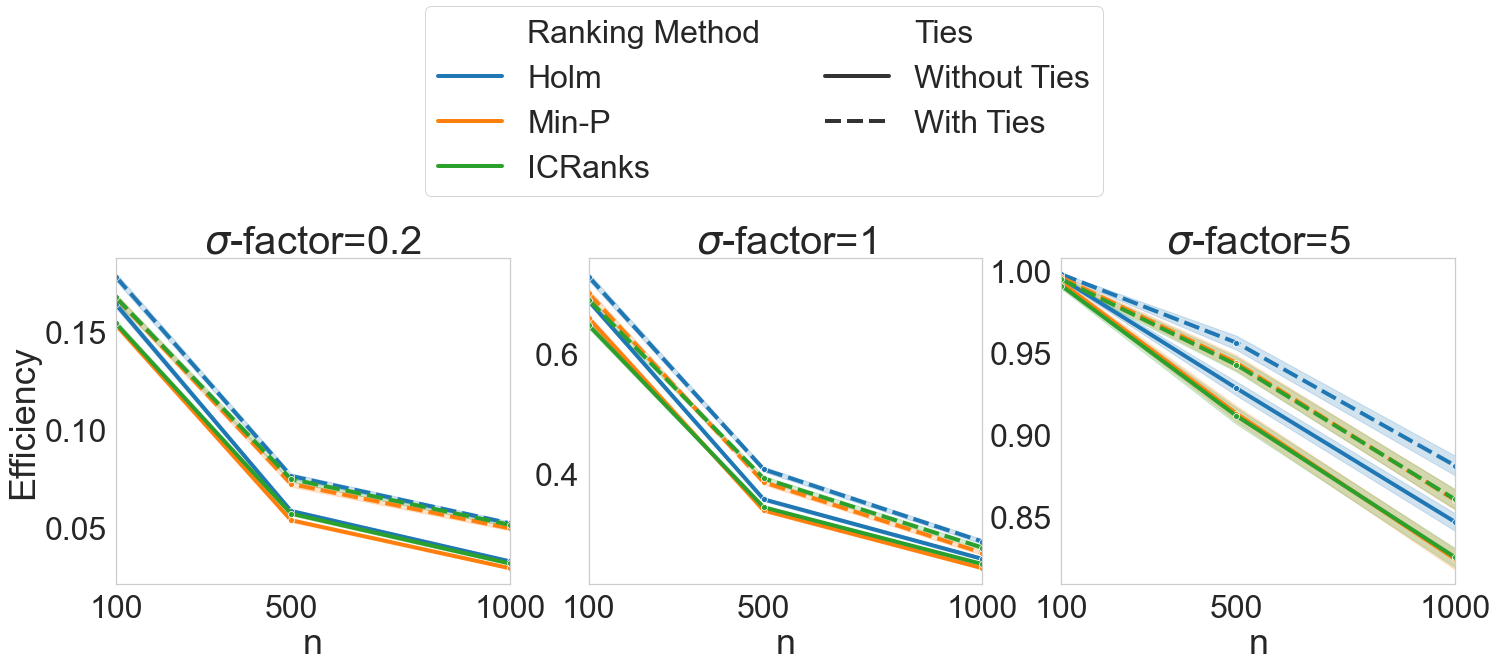

In [16]:
p = 30
factors = [0.2, 1, 5]
corr_type = 'id'
methods = ['Holm', 'ICRanks', 'Min-P']
mu_exponent = 0.25


plot_data_example1 = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                 & (plot_data_simulated['factor'].isin(factors)) 
                                 & (plot_data_simulated['p'] == p) 
                                 & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                 & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example1, 'n', 'factor', factors, r'$\sigma$-factor=', style_param='Ties', sharey=False);

### With correlations

In [17]:
p = 30
corr_type = 'off_diag'
methods = ['Holm', 'ICRanks', 'Min-P']
mu_exponent = 0.25
rhos = [0.1, 0.5, 0.9]

#### Example 2

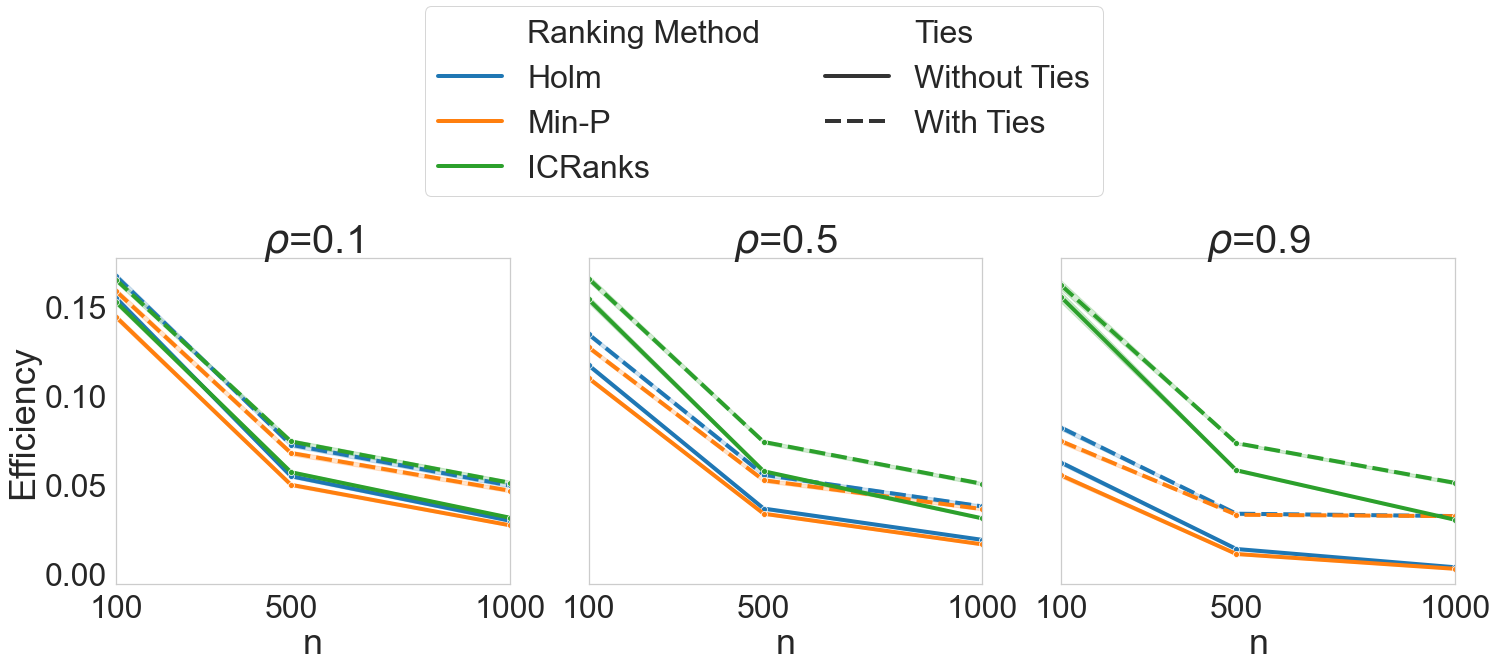

In [18]:
factor = 0.2
plot_data_example2 = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                 & (plot_data_simulated['factor'] == factor) 
                                 & (plot_data_simulated['p'] == p) 
                                 & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                 & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example2, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties');

#### Example 3

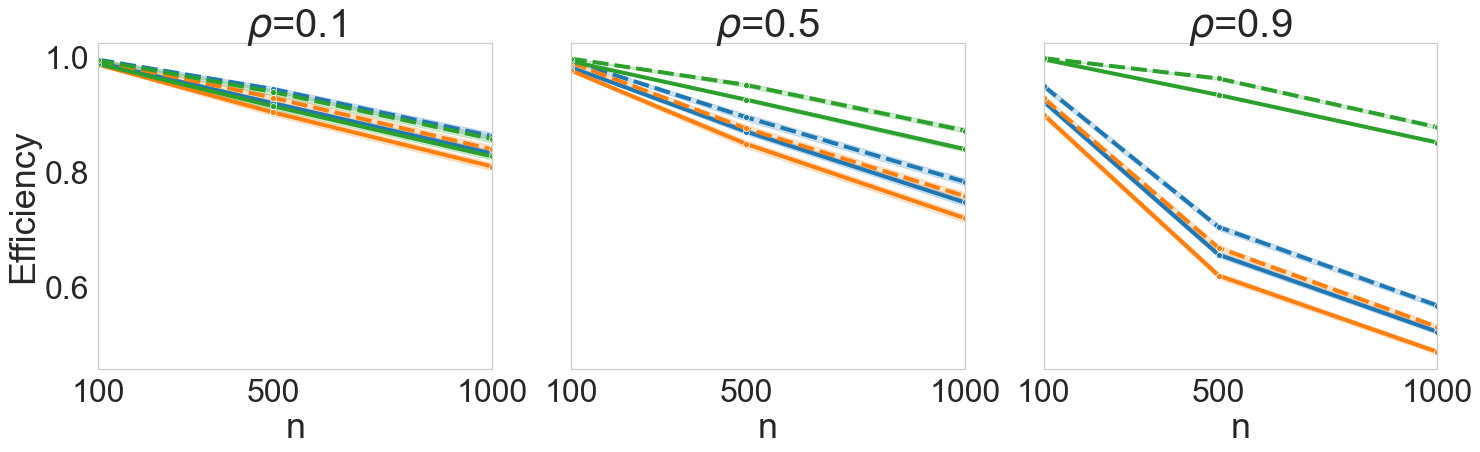

In [19]:
factor = 5
plot_data_example3 = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                 & (plot_data_simulated['factor'] == factor) 
                                 & (plot_data_simulated['p'] == p) 
                                 & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                 & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example3, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties', hide_legend=True);

## Additional results

### Same as in the paper for p=10 and p=50

#### p=10

In [20]:
p = 10
corr_type = 'off_diag'
methods = ['Holm', 'ICRanks', 'Min-P']
mu_exponent = 0.25
rhos = [0.1, 0.5, 0.9]

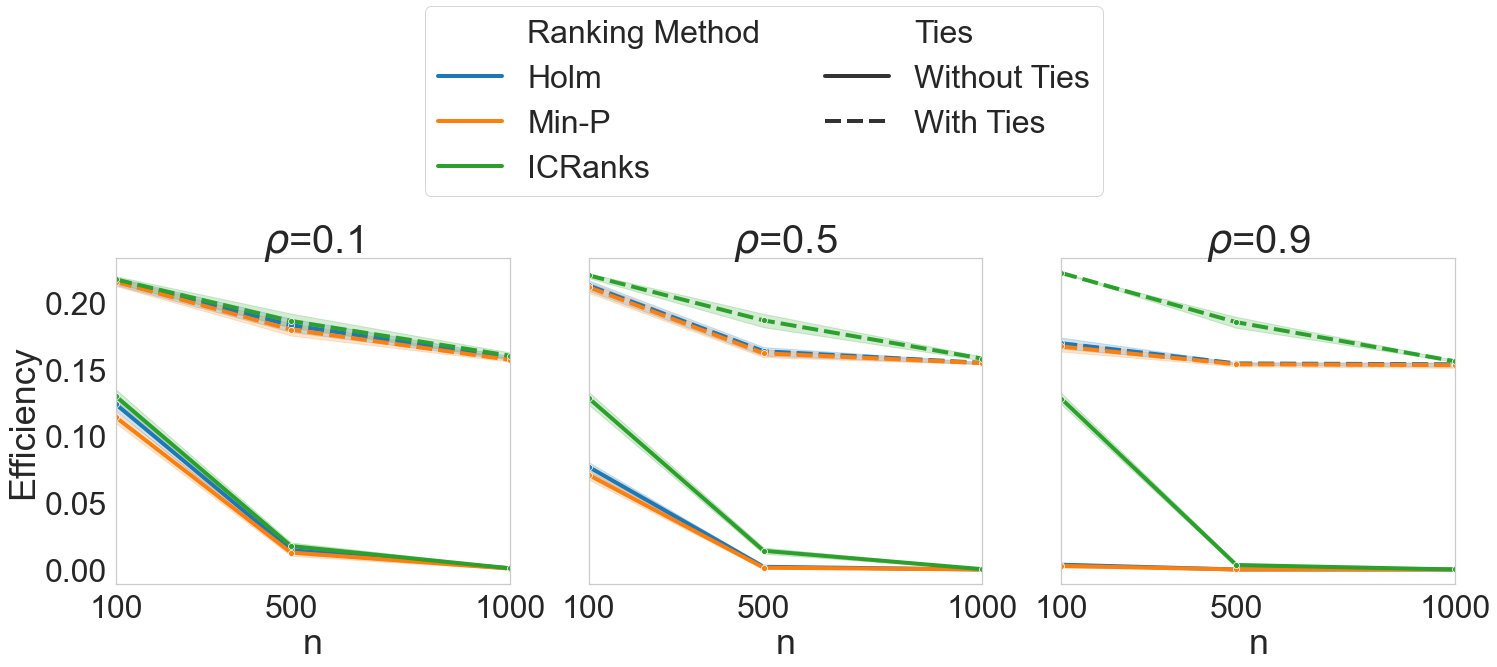

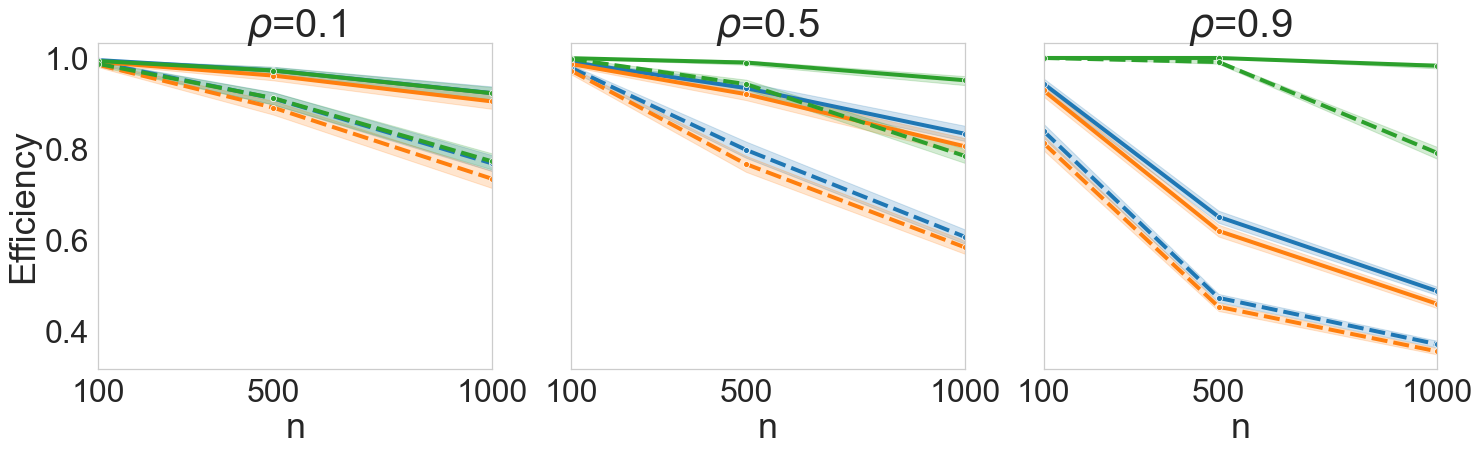

In [21]:
factor = 0.2
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['p'] == p) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties');

factor = 5
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['p'] == p) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties', hide_legend=True);

#### p=50

In [22]:
p = 50
corr_type = 'off_diag'
methods = ['Holm', 'ICRanks', 'Min-P']
mu_exponent = 0.25
rhos = [0.1, 0.5, 0.9]

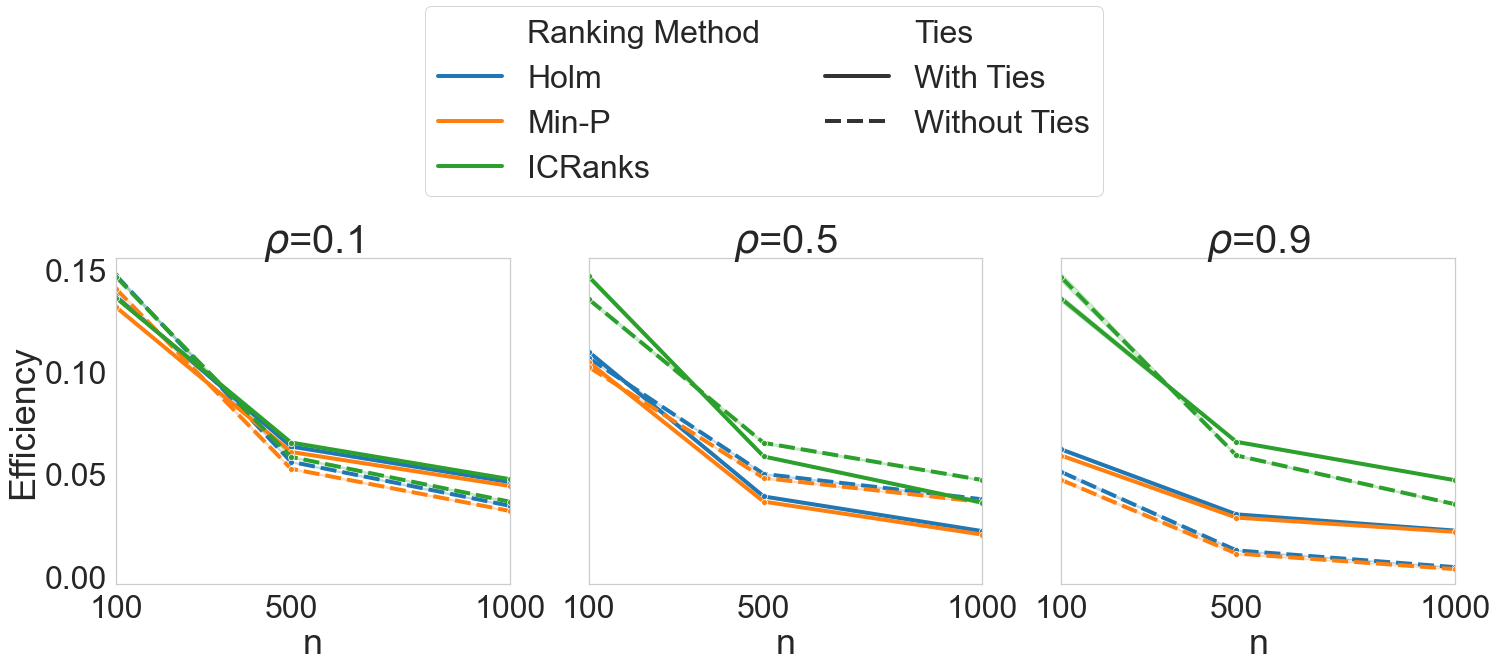

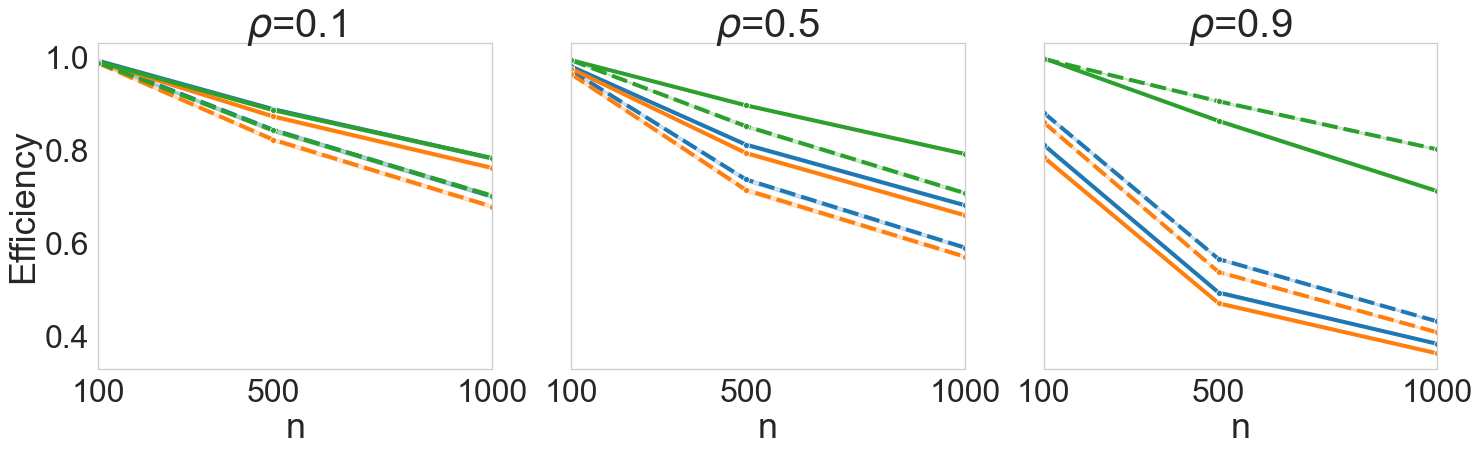

In [23]:
factor = 0.2
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['p'] == p) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties');

factor = 5
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['p'] == p) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'n', 'rho', rhos, r'$\rho$=', style_param='Ties', hide_legend=True);

### Compare number of features

In [24]:
ps = [10, 30, 50]
factor = 1
rho = 0.5
corr_type = 'off_diag'
methods = ['Holm', 'ICRanks', 'Min-P']
n = 500
mu_exponents = [0.5, 0.25, 0.1]

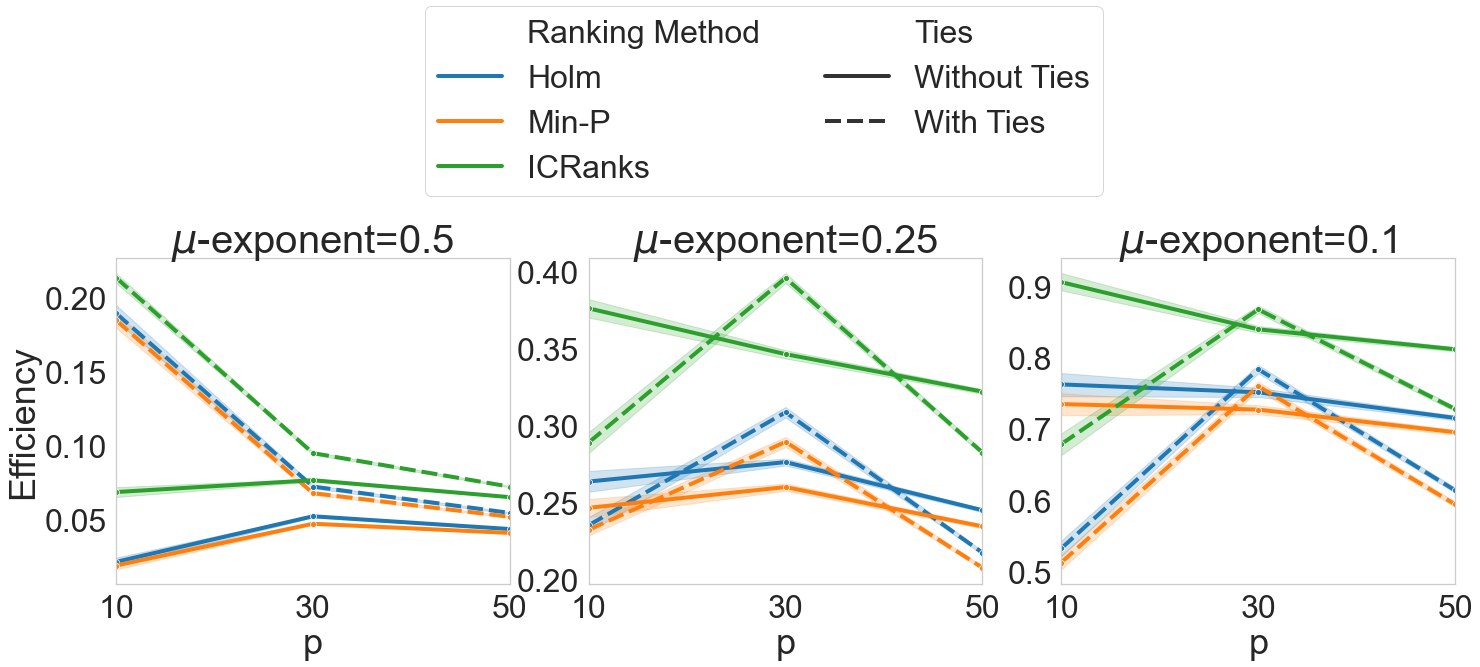

In [25]:
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['n'] == n) 
                                    & (plot_data_simulated['rho'] == rho) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'p', 'mu_exponent', mu_exponents, r'$\mu$' + '-exponent=', style_param='Ties', sharey=False);

In [26]:
ps = [10, 30, 50]
factors = [0.2, 1, 5]
rho = 0.5
corr_type = 'off_diag'
methods = ['Holm', 'ICRanks', 'Min-P']
n = 500
mu_exponent = 0.25

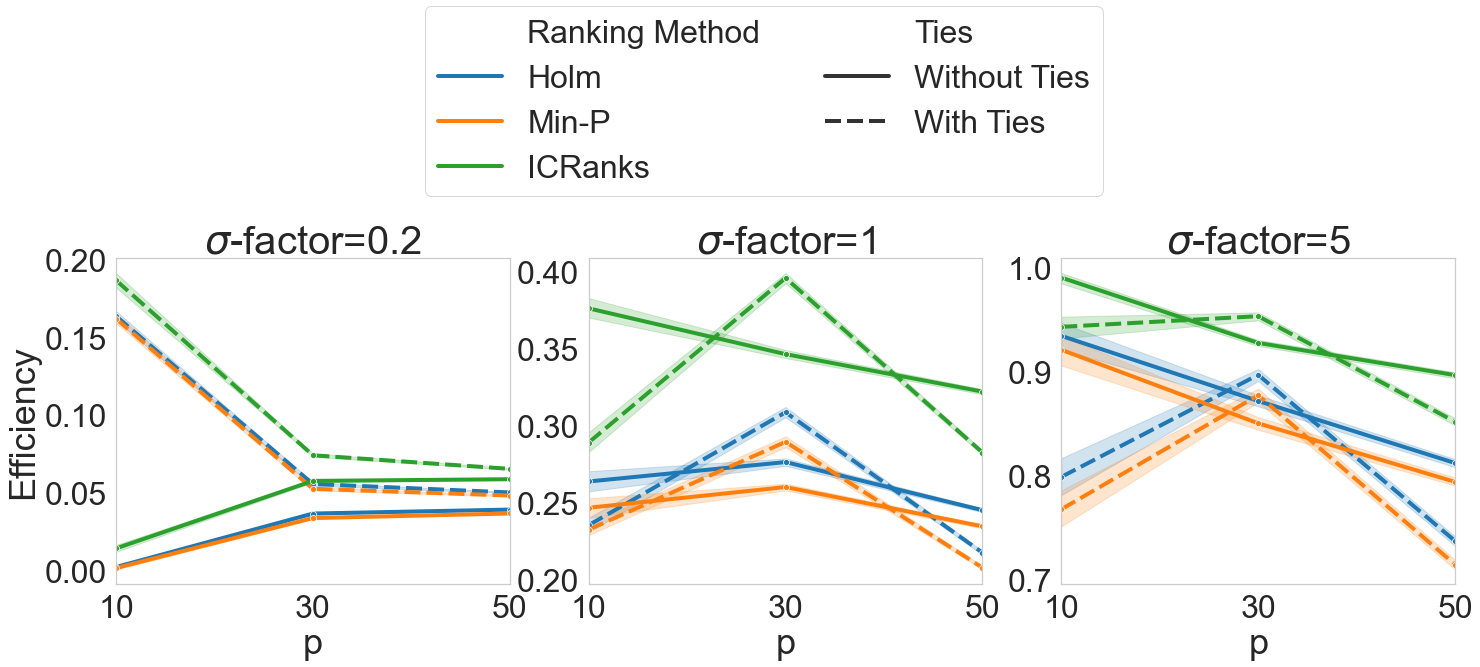

In [27]:
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['n'] == n) 
                                    & (plot_data_simulated['rho'] == rho) 
                                    & (plot_data_simulated['corr_type'] == corr_type))].reset_index(drop=True)

plot_efficiency(plot_data_example, 'p', 'factor', factors, r'$\sigma$-factor=', style_param='Ties', sharey=False);

### Compare correlation structures

In [28]:
ps = [10, 30, 50]
factor = 1
corr_types = ['off_diag', 'pairs']
methods = ['Holm', 'ICRanks', 'Min-P']
n = 500
mu_exponent = 0.25

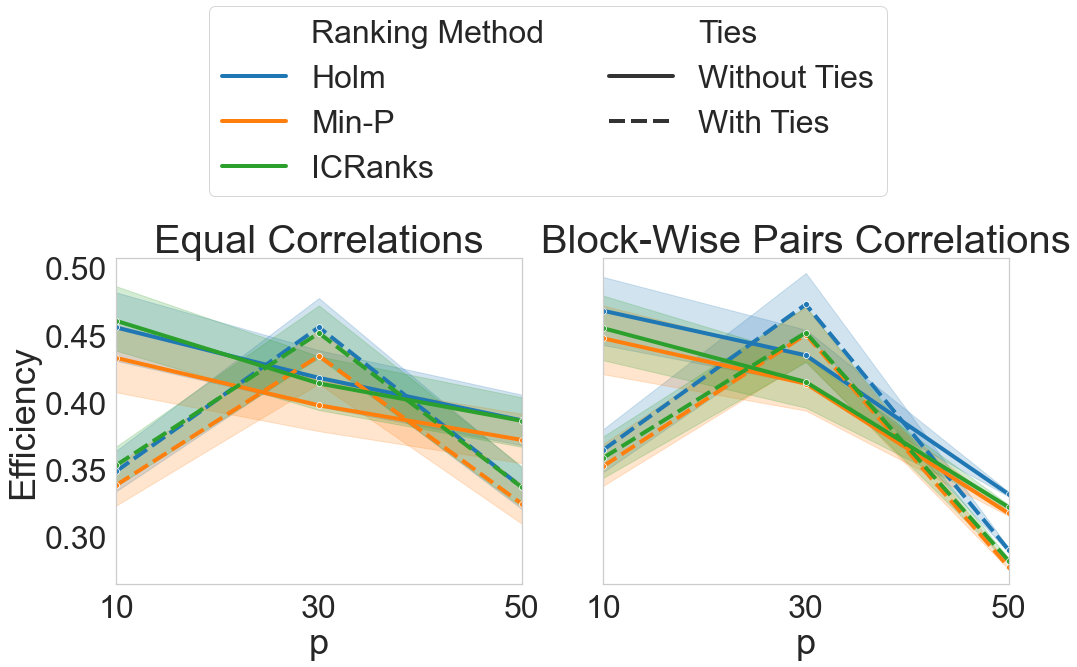

In [29]:
rho = 0.1
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['rho'] == rho) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'].isin(corr_types)))].reset_index(drop=True)

fig, axs = plot_efficiency(plot_data_example, 'p', 'corr_type', corr_types, param_prefix='', style_param='Ties')
axs[0].set_title('Equal Correlations')
axs[1].set_title('Block-Wise Pairs Correlations');

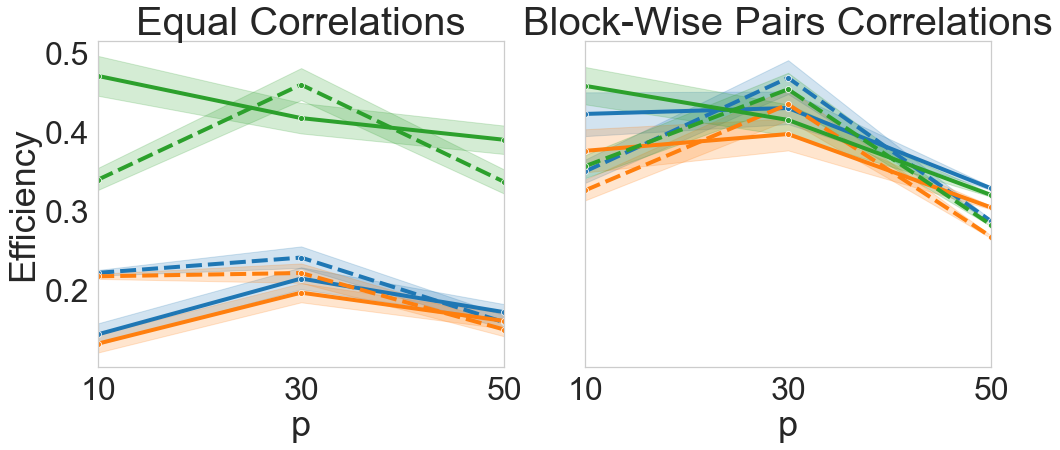

In [30]:
rho = 0.9
plot_data_example = plot_data_simulated[((plot_data_simulated['Ranking Method'].isin(methods)) 
                                    & (plot_data_simulated['factor'] == factor) 
                                    & (plot_data_simulated['rho'] == rho) 
                                    & (plot_data_simulated['mu_exponent'] == mu_exponent) 
                                    & (plot_data_simulated['corr_type'].isin(corr_types)))].reset_index(drop=True)

fig, axs = plot_efficiency(plot_data_example, 'p', 'corr_type', corr_types, param_prefix='', style_param='Ties', hide_legend=True)
axs[0].set_title('Equal Correlations')
axs[1].set_title('Block-Wise Pairs Correlations');

# PFI analysis

In [31]:
results_path_pfi = r'results/low_variance_FI/PFI/'

In [32]:
df_base = pd.read_csv(results_path_pfi + 'base_to_global_std.csv')

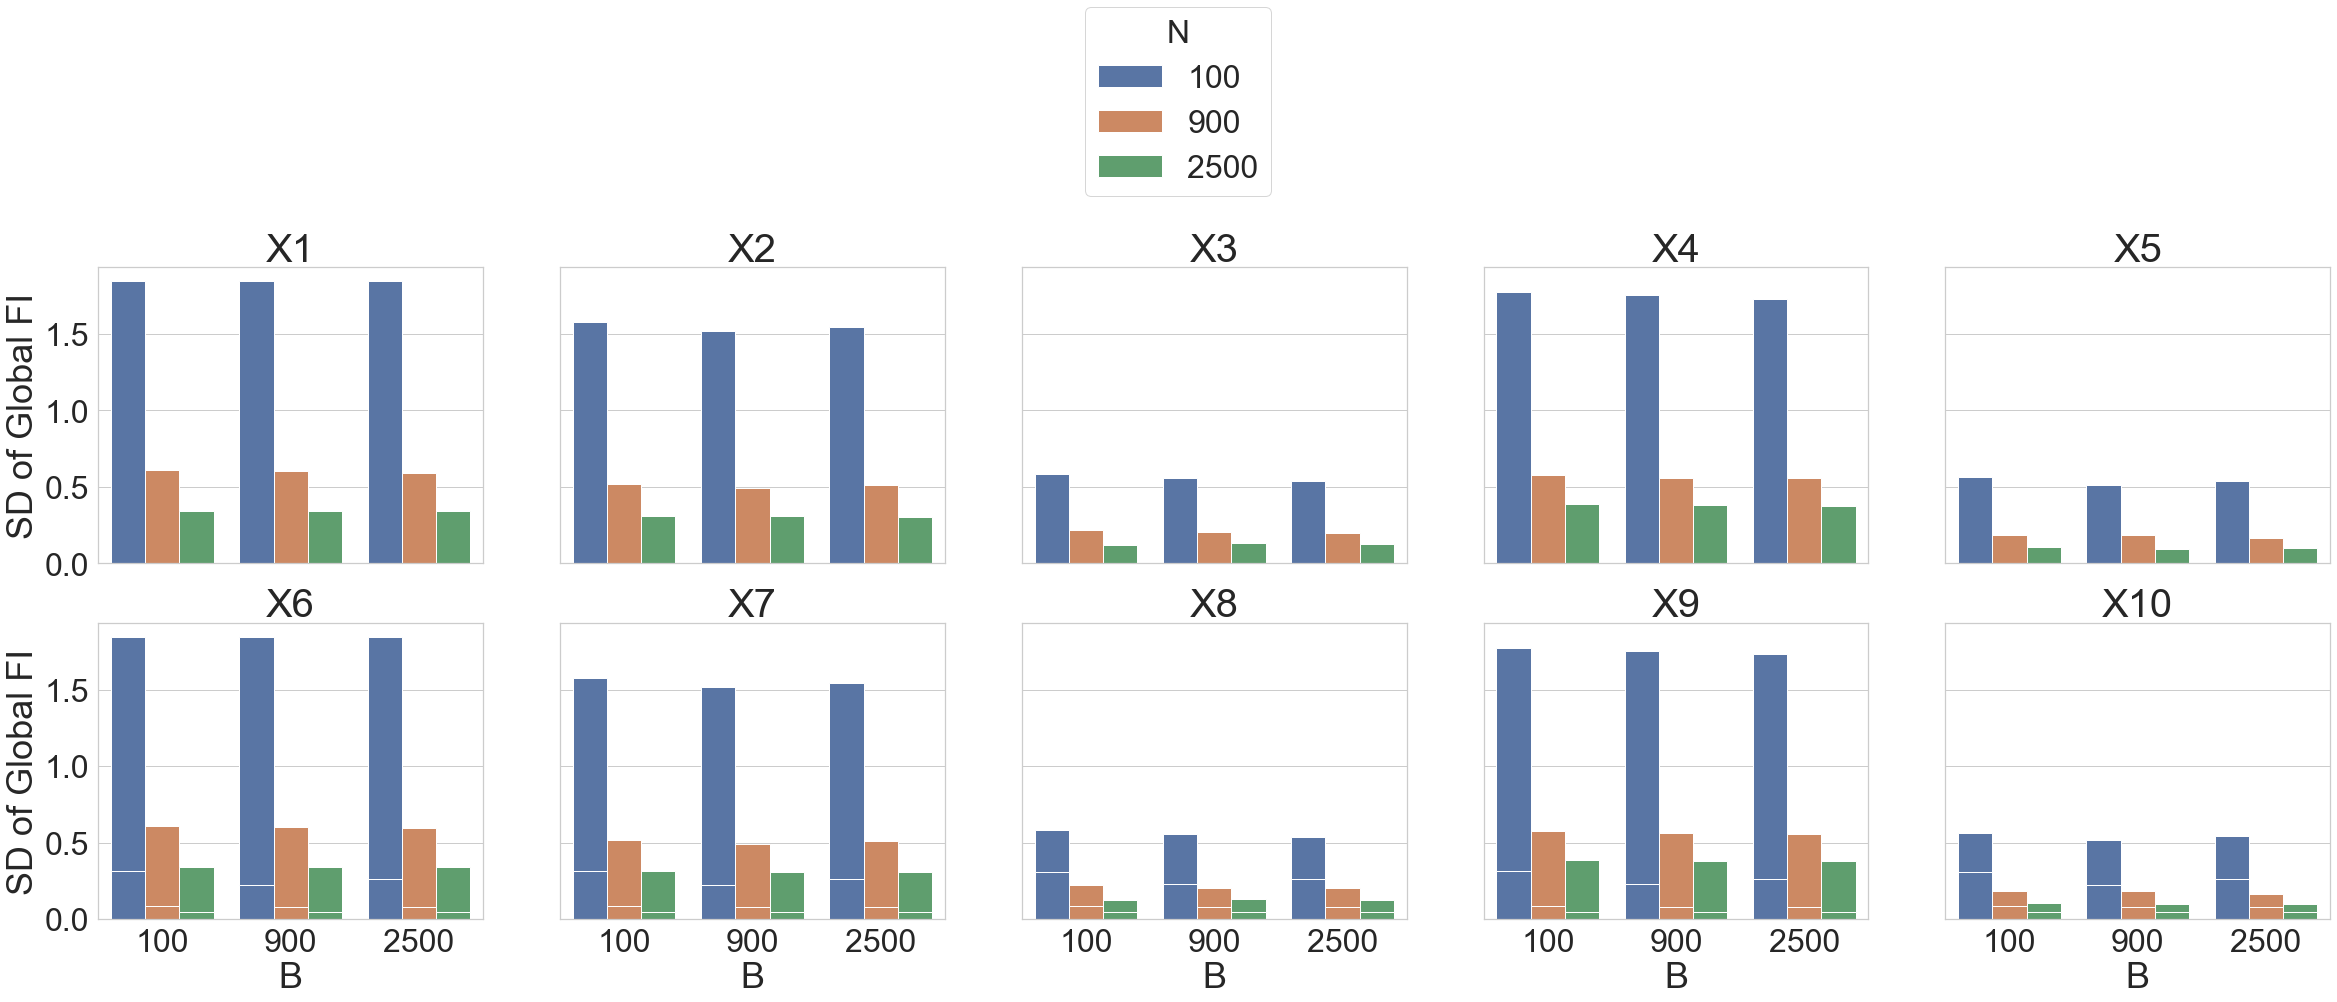

In [33]:
df_base_1 = df_base[df_base['func_ind'] == 1].reset_index(drop=True)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(5 * 8,  6 * 2), sharey=True, sharex=True)
i = 0
j = 0
for feature in df_base_1['feature']:
    data = df_base_1[df_base_1['feature'] == feature].reset_index(drop=True)
    sns.barplot(data=data, x='B', y='scores_std', hue='n', ci='sd', ax=axs[i][j])
    axs[i][j].legend([],[], frameon=False)    
    axs[i][j].set_title(feature)
    if j == 0:
        axs[i][j].set_ylabel('SD of Global FI')
    else:
        axs[i][j].set_ylabel(None)
    if i == 0:
        axs[i][j].set_xlabel(None)
    j += 1
    if j == 5:
        i = 1
        j = 0

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.2), title='N');

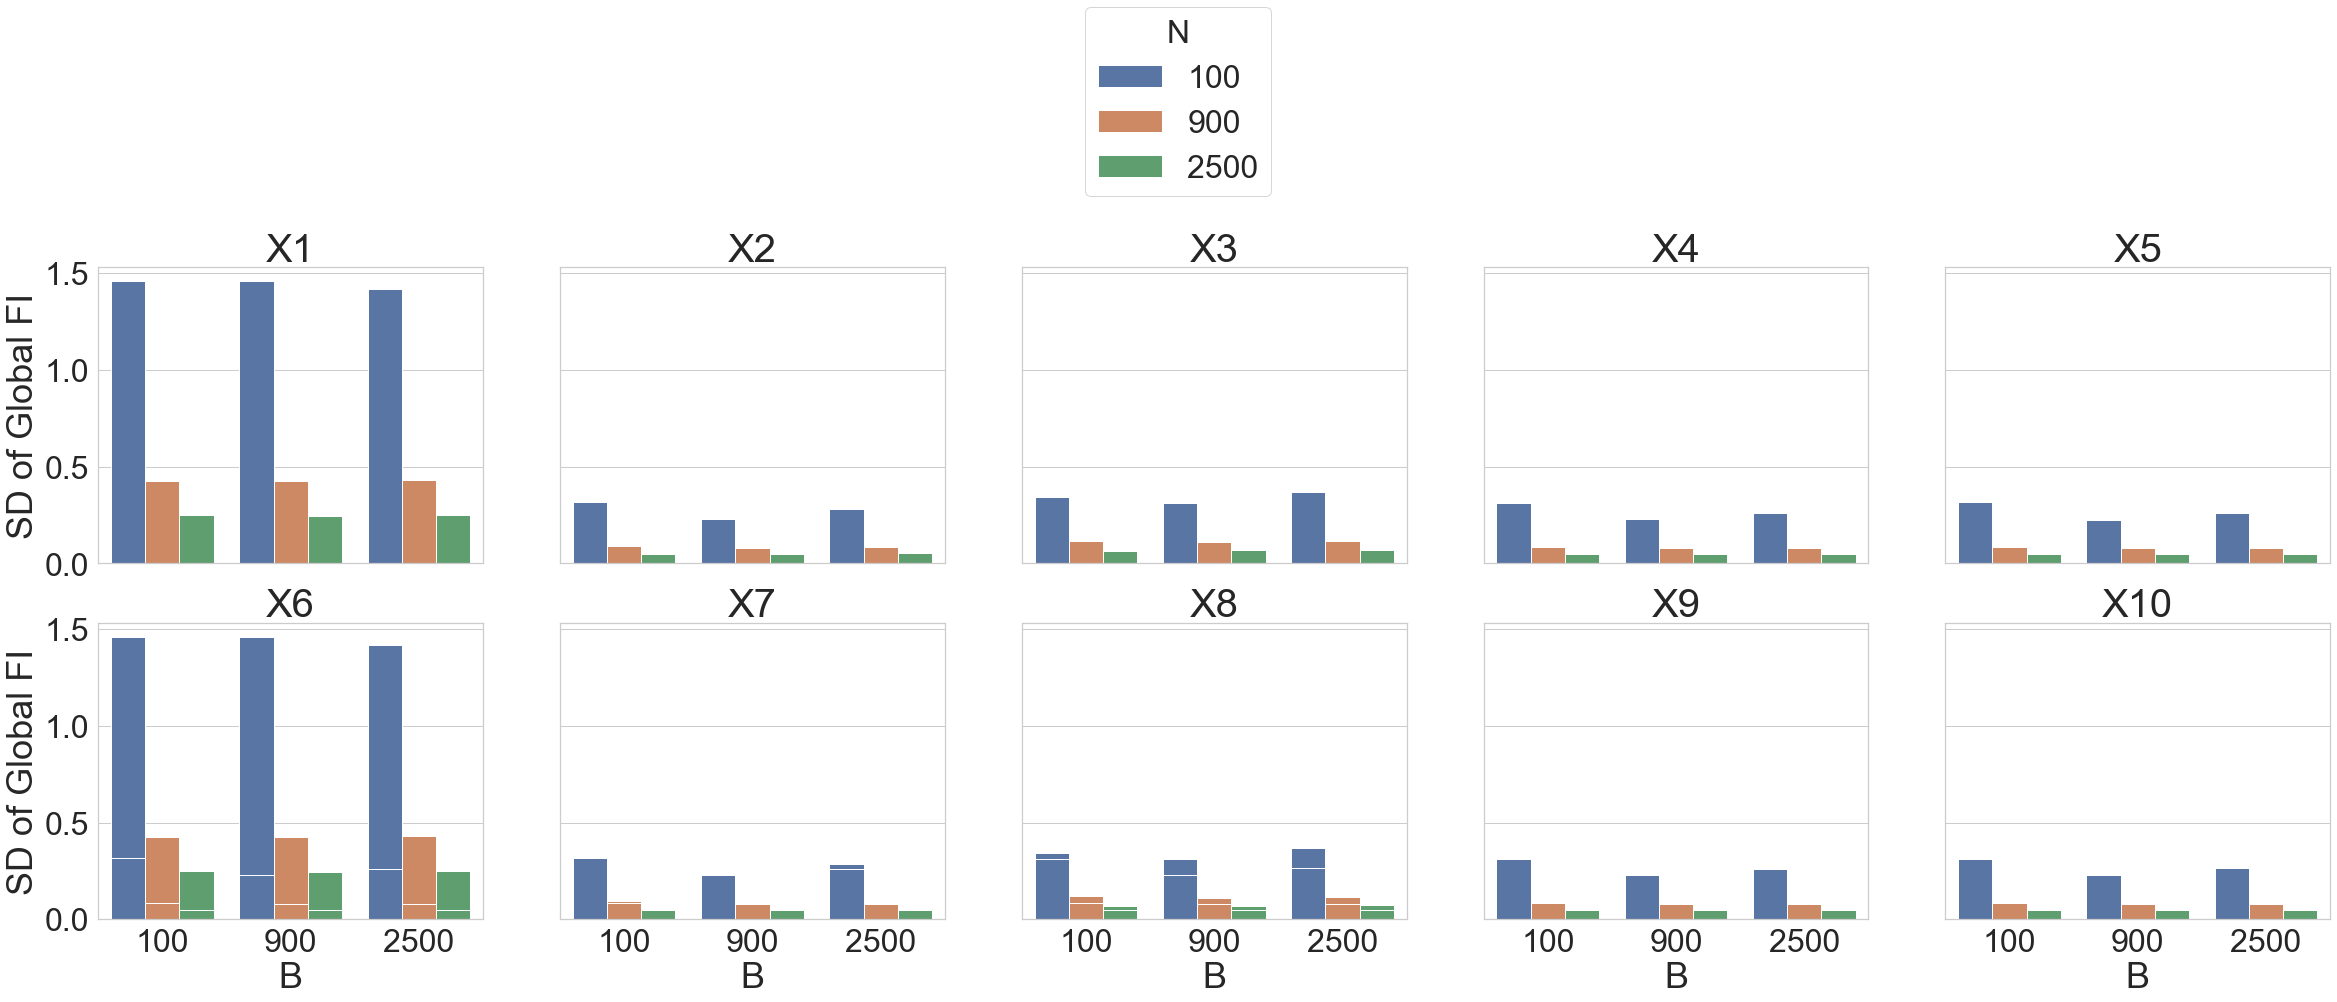

In [34]:
df_base_2 = df_base[df_base['func_ind'] == 2].reset_index(drop=True)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(5 * 8,  6 * 2), sharey=True, sharex=True)
i = 0
j = 0
for feature in df_base_2['feature']:
    data = df_base_2[df_base_2['feature'] == feature].reset_index(drop=True)
    sns.barplot(data=data, x='B', y='scores_std', hue='n', ci='sd', ax=axs[i][j])
    axs[i][j].legend([],[], frameon=False)
    axs[i][j].set_title(feature)
    if j == 0:
        axs[i][j].set_ylabel('SD of Global FI')
    else:
        axs[i][j].set_ylabel(None)
    if i == 0:
        axs[i][j].set_xlabel(None)
    j += 1
    if j == 5:
        i = 1
        j = 0

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.2), title='N');

# SHAP

In [35]:
results_path_shap = r'results/low_variance_FI/SHAP/'

In [36]:
results_shap = pd.read_csv(results_path_shap + 'feature_importance_ranks_measures_SHAP.csv')
results_shap.head()

,p,n,model_type,func_ind,alpha,rep_bootstrap,rep_seed,rank_method,importance_method,efficiency,coverage,simultaneous_coverage,shap_time,ranking_time
0,50,1000,xgb,2,0.1,2500,61,holm,shap,0.281633,1.0,1,2.935414,1.433925
1,50,1000,xgb,2,0.1,2500,61,min_p,shap,0.275918,1.0,1,2.935414,962.565792
2,50,1000,xgb,2,0.1,2500,61,icranks,shap,0.271020,1.0,1,2.935414,2.513952
3,50,1000,xgb,2,0.1,2500,71,holm,shap,0.257143,1.0,1,3.187625,1.523734
4,50,1000,xgb,2,0.1,2500,71,min_p,shap,0.260408,1.0,1,3.187625,962.474596


In [37]:
all_comb_shap = results_shap.groupby(['p', 'n', 'model_type', 'func_ind', 'rank_method'])
all_comb_shap = all_comb_shap.agg(efficiency_mean=('efficiency', 'mean'), 
                        efficiency_std=('efficiency', 'std'), 
                        coverage_mean=('coverage', 'mean'), 
                        coverage_std=('coverage', 'std'), 
                        simultaneous_coverage_mean=('simultaneous_coverage', 'mean'), 
                        simultaneous_coverage_std=('simultaneous_coverage', 'std'))
all_comb_shap = all_comb_shap.reset_index()

In [38]:
all_comb_shap.head()

,p,n,model_type,func_ind,rank_method,efficiency_mean,efficiency_std,coverage_mean,coverage_std,simultaneous_coverage_mean,simultaneous_coverage_std
0,10,100,rf,1,holm,0.247111,0.007258,1.0,0.0,1.0,0.0
1,10,100,rf,1,icranks,0.244222,0.004989,1.0,0.0,1.0,0.0
2,10,100,rf,1,min_p,0.244222,0.004989,1.0,0.0,1.0,0.0
3,10,100,rf,2,holm,0.244222,0.050978,1.0,0.0,1.0,0.0
4,10,100,rf,2,icranks,0.231111,0.032672,1.0,0.0,1.0,0.0


In [39]:
all_comb_shap[all_comb_shap['simultaneous_coverage_mean'] < 0.9].shape

(70, 11)

In [40]:
all_comb_shap[all_comb_shap['simultaneous_coverage_mean'] < 0.9]['func_ind'].value_counts()

3    70
Name: func_ind, dtype: int64

In [41]:
all_comb_shap[((all_comb_shap['func_ind'] == 3) & (all_comb_shap['simultaneous_coverage_mean'] < 0.9))]['coverage_mean'].describe()

count    70.000000
mean      0.759421
std       0.175973
min       0.379667
25%       0.623150
50%       0.823667
75%       0.896950
max       0.994400
Name: coverage_mean, dtype: float64

In [42]:
all_comb_shap[all_comb_shap['func_ind'].isin([1, 2])]['simultaneous_coverage_mean'].describe()

count    144.000000
mean       0.997014
std        0.008616
min        0.940000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: simultaneous_coverage_mean, dtype: float64

In [43]:
plot_data_shap = results_shap[results_shap['func_ind'] != 3].reset_index(drop=True)

In [44]:
plot_data_shap = plot_data_shap.drop(['alpha', 'rep_bootstrap', 'rep_seed', 'importance_method', 'coverage'], axis=1)
plot_data_shap['rank_method'] = plot_data_shap['rank_method'].map({'holm': 'Holm', 'min_p': 'Min-P', 'icranks': 'ICRanks'})
plot_data_shap = plot_data_shap.rename(columns={'rank_method': 'Ranking Method'})

In [45]:
def plot_example(data, model_type, func_ind, hide_legend=False, out_path='', save_fig=False):
    ps = sorted(data['p'].unique())
    ncols = len(ps)
    fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols * 8,  6), sharey=True)
    for i, p in enumerate(ps):
        data_p = data[data['p'] == p].reset_index(drop=True)
        sns.barplot(data=data_p, x='n', y='efficiency', hue='Ranking Method', ci='sd', ax=axs[i])
        axs[i].legend([],[], frameon=False)    
        axs[i].set_title('p=' + str(p))
        if i == 0:
            axs[i].set_ylabel('Efficiency')
        else: 
            axs[i].set_ylabel(None)
    
    if not hide_legend:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.3), title='Ranking Method')
    
    if save_fig:
        fig_path = out_path + model_type + '_' + str(func_ind) + '.pdf'
        plt.savefig(fig_path, bbox_inches='tight')

### Example 1

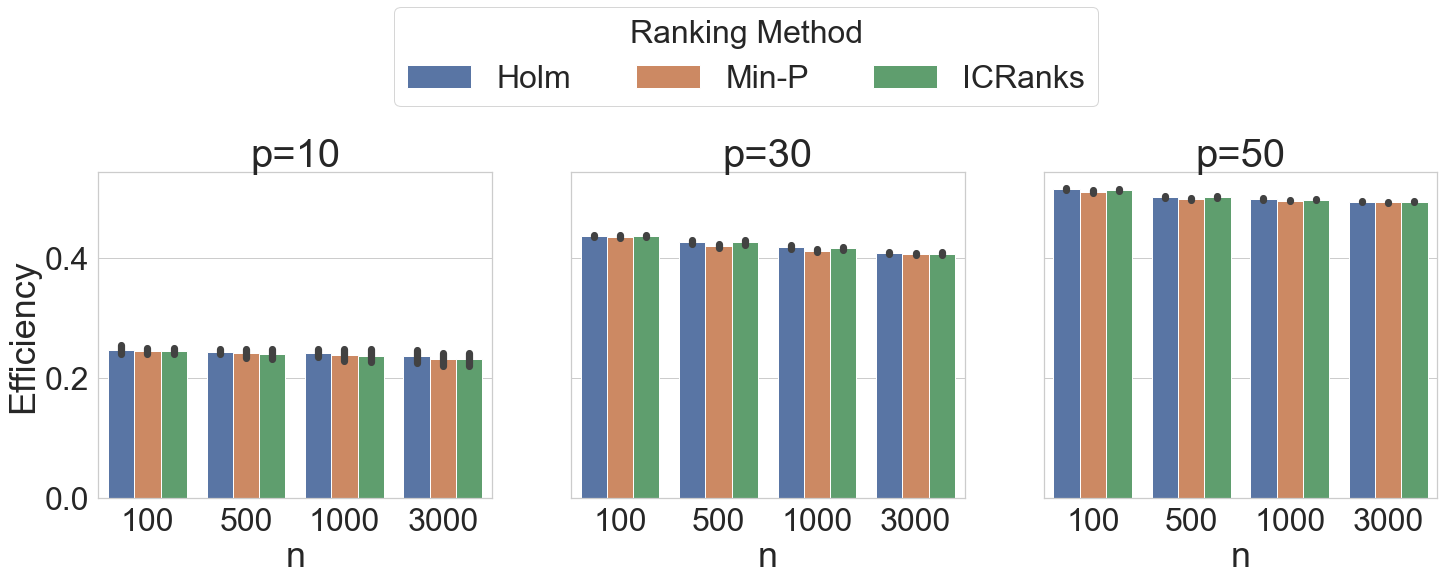

In [46]:
model_type = 'rf'
func_ind = 1

example1 = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_example(example1, model_type, func_ind);

### Example 2

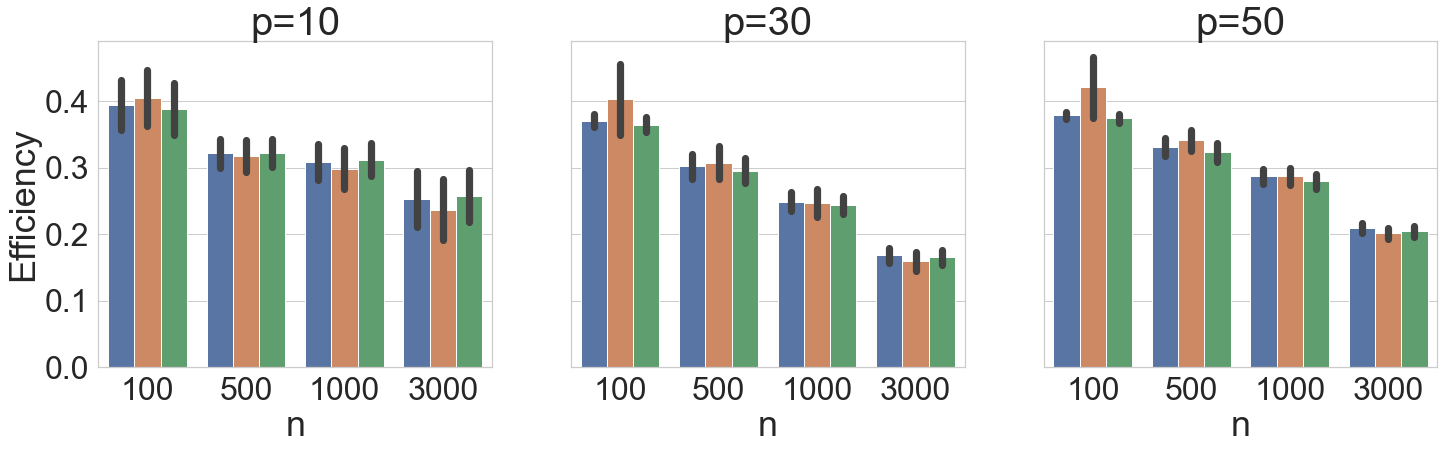

In [47]:
model_type = 'xgb'
func_ind = 2

example2 = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_example(example2, model_type, func_ind, hide_legend=True);

### Runtime

In [48]:
def plot_times(data, hide_legend=False, out_path='', save_fig=False):
    x = 'p'
    param = 'Ranking Method'
    param_options = ['SHAP', 'Holm', 'Min-P', 'ICRanks']
    ncols = len(param_options)
    fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols * 8,  6), sharey=False)
    for i, param_option in enumerate(param_options):
        if param_option == 'SHAP':
            data_param = data[data[param] == param_options[1]].reset_index(drop=True)
            sns.lineplot(data=data_param, x=x, y='shap_time',  hue='n', 
                         marker='o', ax=axs[i], palette="tab10")
        else:
            data_param = data[data[param] == param_option].reset_index(drop=True)
            sns.lineplot(data=data_param, x=x, y='ranking_time',  hue='n', 
                     marker='o', ax=axs[i], palette="tab10")
        
        axs[i].legend([],[], frameon=False)    
        axs[i].set_title(param_option)
        if i == 0:
            axs[i].set_ylabel('Time (s)')
        else: 
            axs[i].set_ylabel(None)

        axs[i].set_xticks(data_param[x].unique())
        axs[i].grid(False)
        xmin = data_param[x].min()
        xmax = data_param[x].max()
        axs[i].set_xlim([xmin, xmax])
    
    if not hide_legend:
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.5), title='n')

    if save_fig:
        fig_path = out_path + model_type + '_' + str(func_ind) + '_times.pdf'
        plt.savefig(fig_path, bbox_inches='tight')
    return fig, axs

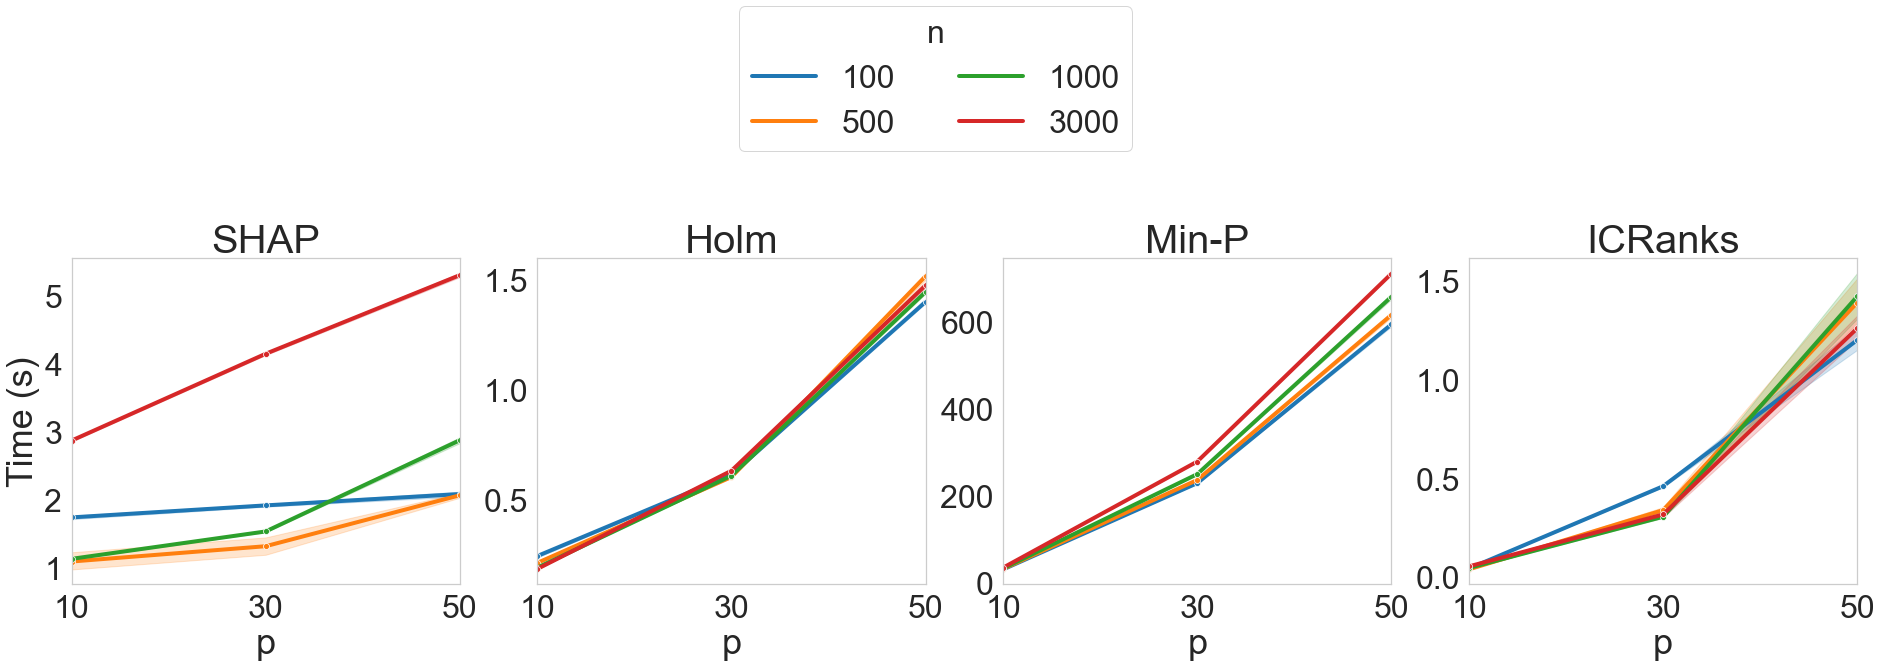

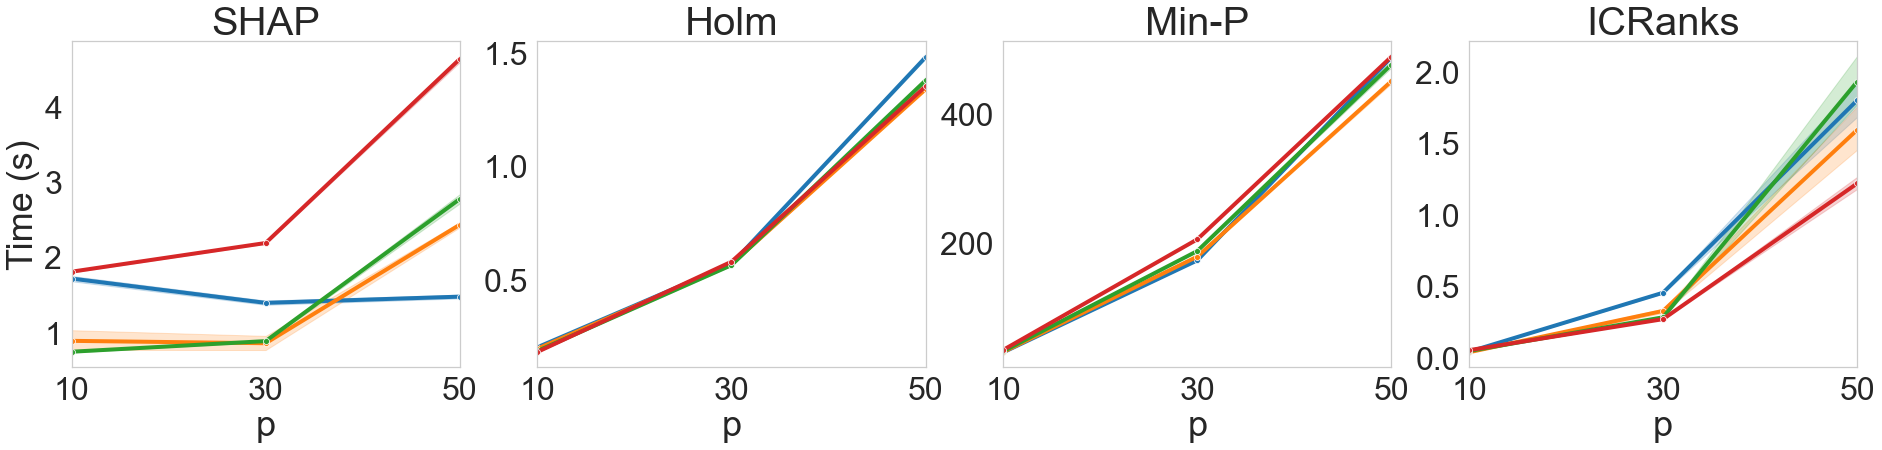

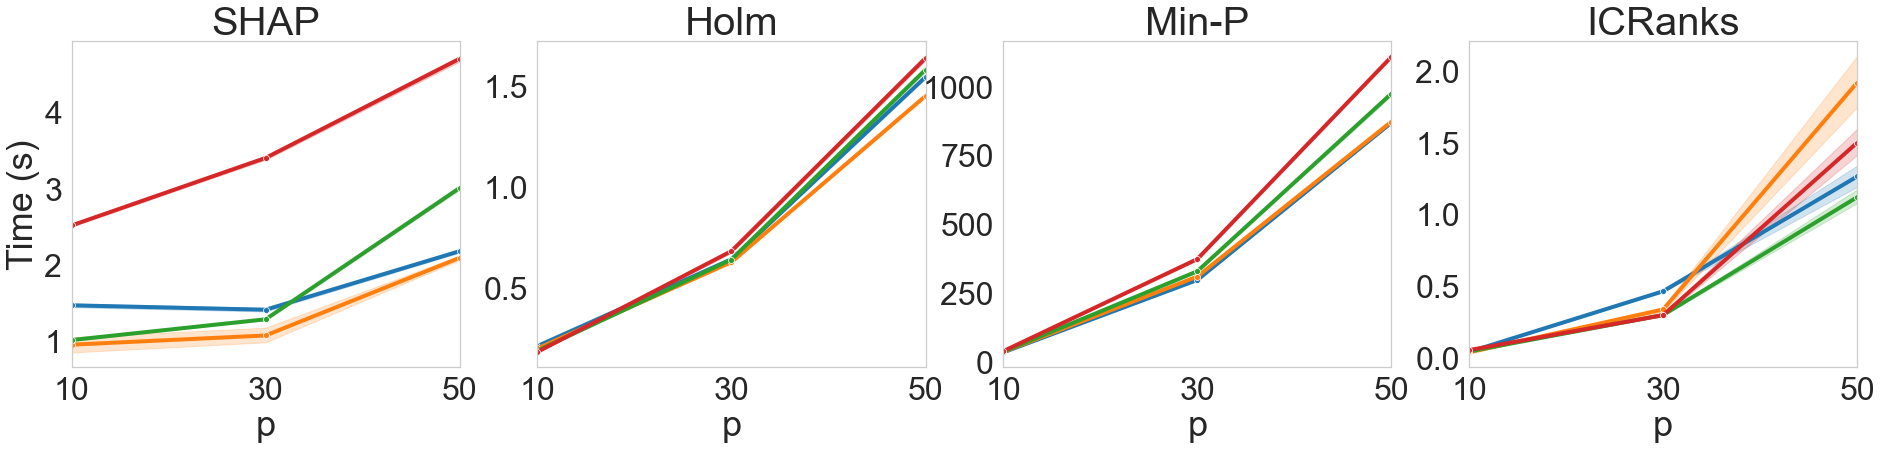

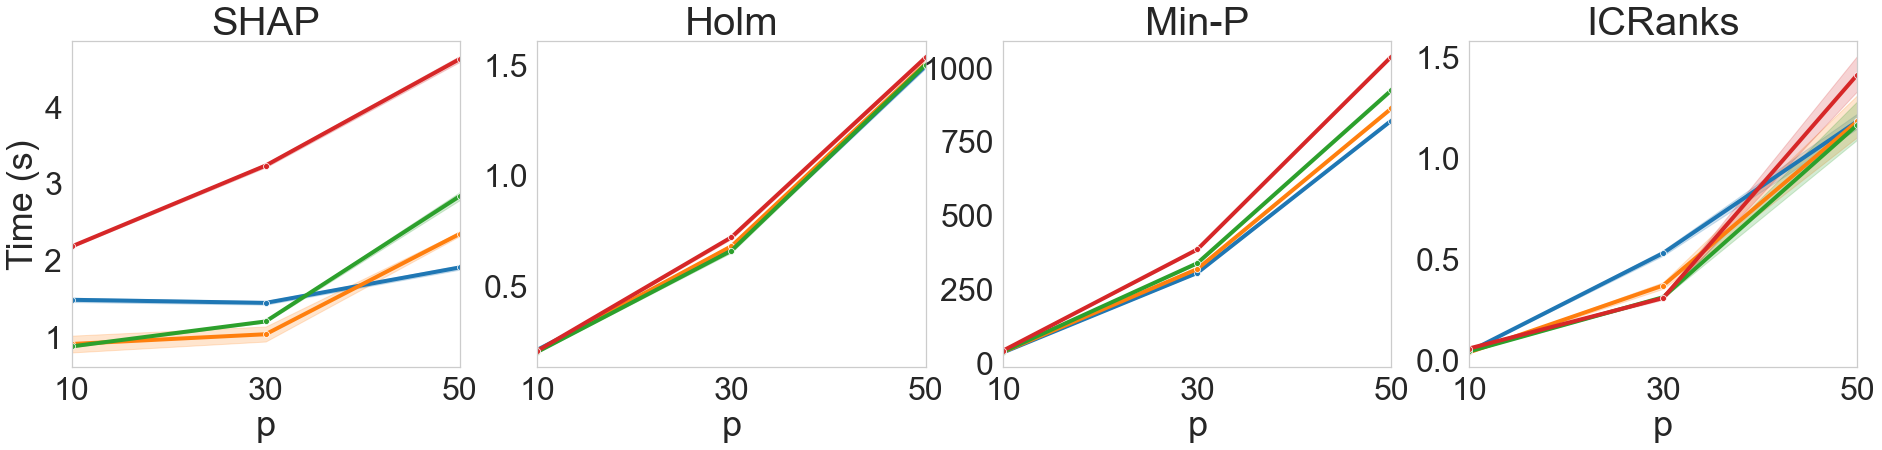

In [49]:
model_type = 'rf'
func_ind = 1

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_times(example);

model_type = 'rf'
func_ind = 2

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_times(example, hide_legend=True);

model_type = 'xgb'
func_ind = 1

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_times(example, hide_legend=True);

model_type = 'xgb'
func_ind = 2

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_times(example, hide_legend=True);


### Additional results

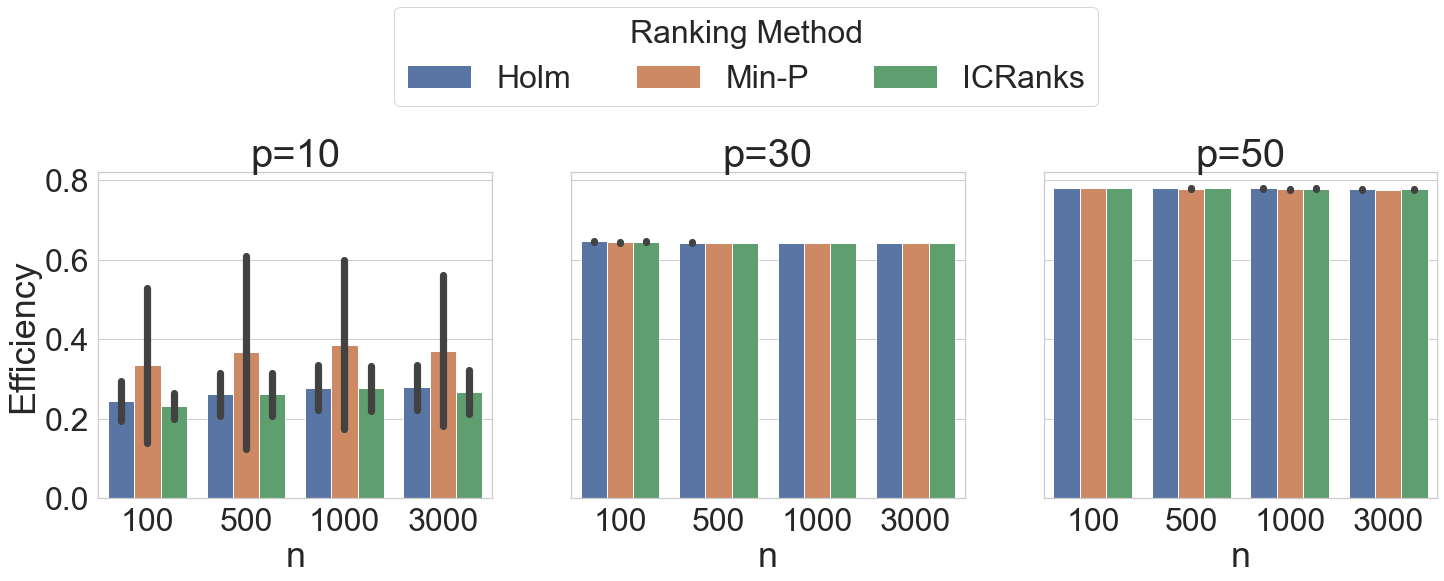

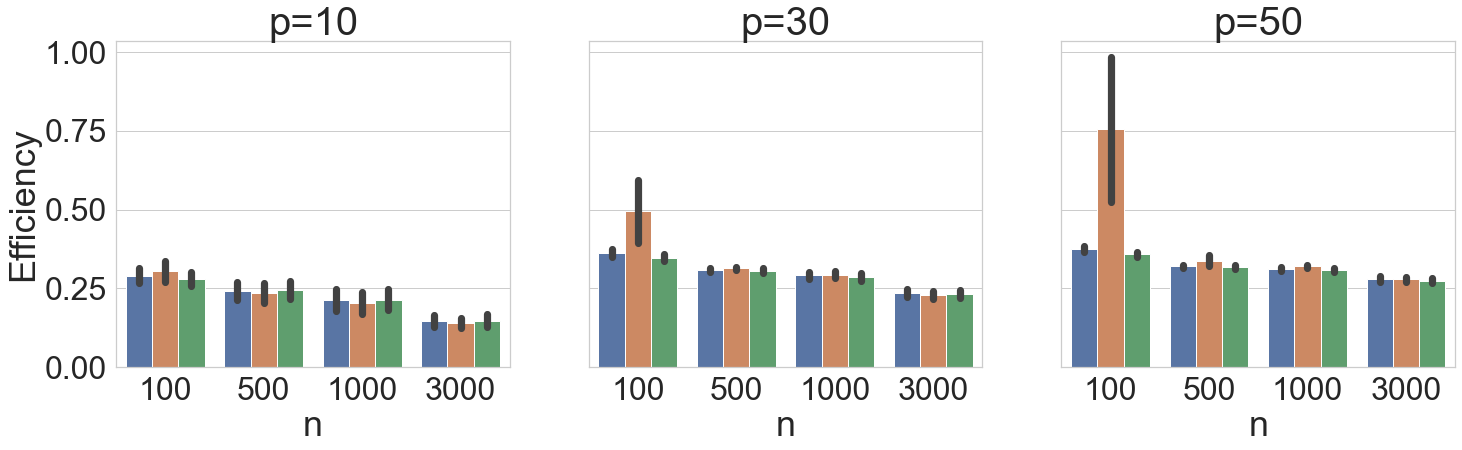

In [50]:
model_type = 'rf'
func_ind = 2

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_example(example, model_type, func_ind);

model_type = 'xgb'
func_ind = 1

example = plot_data_shap[((plot_data_shap['model_type'] == model_type) & (plot_data_shap['func_ind'] == func_ind))].reset_index(drop=True)
plot_example(example, model_type, func_ind, hide_legend=True);

### Efficiency of the true FI values

In [51]:
true_filename = results_path_shap + '/true_feature_importance_all_models.npy'
true_importance = np.load(true_filename, allow_pickle=True).item()

all_comb_efficiency = all_comb_shap[((all_comb_shap['func_ind'].isin([1, 2])) & (all_comb_shap['n'] == 1000) & (all_comb_shap['rank_method'] == 'min_p'))].reset_index(drop=True)
all_comb_efficiency = all_comb_efficiency.drop(['efficiency_std', 'coverage_mean', 'coverage_std',
                                                'simultaneous_coverage_mean', 'simultaneous_coverage_std'], axis=1)

In [52]:
all_comb_efficiency['true_efficiency'] = np.nan
for i, row in all_comb_efficiency.iterrows():
    model_params_str = '_'.join([row['model_type'], str(row['func_ind']), str(row['p'])])
    shap_true = true_importance[model_params_str]['shap_means_true']
    true_rank_L, true_rank_U = calc_true_rank(shap_true)
    all_comb_efficiency.at[i, 'true_efficiency'] = calc_efficiency(true_rank_U, true_rank_L)

In [53]:
all_comb_efficiency = all_comb_efficiency.round(3)[['model_type', 'func_ind', 'p', 'true_efficiency', 'efficiency_mean']]
all_comb_efficiency.sort_values(by=['model_type', 'func_ind', 'p']).reset_index(drop=True)

,model_type,func_ind,p,true_efficiency,efficiency_mean
0,rf,1,10,0.222,0.238
1,rf,1,30,0.393,0.412
2,rf,1,50,0.486,0.495
3,rf,2,10,0.222,0.386
4,rf,2,30,0.634,0.641
5,rf,2,50,0.772,0.777
6,xgb,1,10,0.000,0.204
7,xgb,1,30,0.000,0.293
8,xgb,1,50,0.000,0.320
9,xgb,2,10,0.000,0.299
